## Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
import sys
from gammli import GAMMLI
from gammli.dataReader import data_initialize
from gammli.utils import local_visualize
from gammli.utils import global_visualize_density
from gammli.utils import feature_importance_visualize
from gammli.utils import plot_trajectory
from gammli.utils import plot_regularization
import tensorflow as tf

random_state = 0
data= pd.read_csv('data/simulation/sim_0.9_new.csv')
task_type = "Regression"

meta_info = OrderedDict()

meta_info['x1']={'type': 'continues','source':'user'}
meta_info['x2']={'type': 'continues','source':'user'}
meta_info['x3']={'type': 'continues','source':'user'}
meta_info['x4']={'type': 'continues','source':'user'}
meta_info['x5']={'type': 'continues','source':'user'}
meta_info['z1']={'type': 'continues','source':'item'}
meta_info['z2']={'type': 'continues','source':'item'}
meta_info['z3']={'type': 'continues','source':'item'}
meta_info['z4']={'type': 'continues','source':'item'}
meta_info['z5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}

In [3]:
random_state = 0
train , test = train_test_split(data,test_size=0.2 ,random_state=0)

tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info,sy,sy_t = data_initialize(train,test,meta_info,task_type ,'warm', random_state, True)
model = GAMMLI(wc='warm',model_info=model_info, meta_info=meta_info, subnet_arch=[20, 10],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=min(500, int(0.2*tr_x.shape[0])), lr_bp=0.001, auto_tune=False,
               interaction_epochs=1000,main_effect_epochs=1000,tuning_epochs=200,loss_threshold_main=0.01,loss_threshold_inter=0.1,
              verbose=True, early_stop_thres=20,interact_num=10,n_power_iterations=5,n_oversamples=10, u_group_num=10, i_group_num=10, reg_clarity=10, lambda_=5,
              mf_training_iters=200,change_mode=False,convergence_threshold=0.0001,max_rank=3,interaction_restrict='intra', si_approach ='als')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

test cold start user: 0
test cold start item: 0
validation cold start user: 0
validation cold start item: 0
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.13920, val loss: 0.13845
Main effects training epoch: 2, train loss: 0.13449, val loss: 0.13398
Main effects training epoch: 3, train loss: 0.13403, val loss: 0.13371
Main effects training epoch: 4, train loss: 0.13358, val loss: 0.13306
Main effects training epoch: 5, train loss: 0.13331, val loss: 0.13291
Main effects training epoch: 6, train loss: 0.13317, val loss: 0.13281
Main effects training epoch: 7, train loss: 0.13301, val loss: 0.13266
Main effects training epoch: 8, train loss: 0.13355, val loss: 0.13296
Main effects training epoch: 9, train loss: 0.13284, val loss: 0.13236
Main effects training epoch: 10, train loss: 0.13282, val loss: 0.13232
Main effects training epoch: 11, train loss: 0.13307, val l

Main effects training epoch: 112, train loss: 0.12290, val loss: 0.12238
Main effects training epoch: 113, train loss: 0.12289, val loss: 0.12243
Main effects training epoch: 114, train loss: 0.12335, val loss: 0.12312
Main effects training epoch: 115, train loss: 0.12292, val loss: 0.12238
Main effects training epoch: 116, train loss: 0.12297, val loss: 0.12244
Main effects training epoch: 117, train loss: 0.12291, val loss: 0.12253
Main effects training epoch: 118, train loss: 0.12352, val loss: 0.12290
Main effects training epoch: 119, train loss: 0.12384, val loss: 0.12362
Main effects training epoch: 120, train loss: 0.12283, val loss: 0.12241
Main effects training epoch: 121, train loss: 0.12287, val loss: 0.12251
Main effects training epoch: 122, train loss: 0.12308, val loss: 0.12257
Main effects training epoch: 123, train loss: 0.12291, val loss: 0.12234
Main effects training epoch: 124, train loss: 0.12295, val loss: 0.12254
Main effects training epoch: 125, train loss: 0.122

Interaction training epoch: 53, train loss: 0.07904, val loss: 0.07856
Interaction training epoch: 54, train loss: 0.07854, val loss: 0.07814
Interaction training epoch: 55, train loss: 0.07843, val loss: 0.07813
Interaction training epoch: 56, train loss: 0.07820, val loss: 0.07803
Interaction training epoch: 57, train loss: 0.07777, val loss: 0.07756
Interaction training epoch: 58, train loss: 0.07763, val loss: 0.07741
Interaction training epoch: 59, train loss: 0.07768, val loss: 0.07738
Interaction training epoch: 60, train loss: 0.07771, val loss: 0.07760
Interaction training epoch: 61, train loss: 0.07722, val loss: 0.07707
Interaction training epoch: 62, train loss: 0.07789, val loss: 0.07769
Interaction training epoch: 63, train loss: 0.07758, val loss: 0.07724
Interaction training epoch: 64, train loss: 0.07707, val loss: 0.07687
Interaction training epoch: 65, train loss: 0.07754, val loss: 0.07746
Interaction training epoch: 66, train loss: 0.07680, val loss: 0.07663
Intera

Interaction training epoch: 168, train loss: 0.06975, val loss: 0.07007
Interaction training epoch: 169, train loss: 0.06934, val loss: 0.06956
Interaction training epoch: 170, train loss: 0.06914, val loss: 0.06930
Interaction training epoch: 171, train loss: 0.06920, val loss: 0.06940
Interaction training epoch: 172, train loss: 0.06960, val loss: 0.06990
Interaction training epoch: 173, train loss: 0.06975, val loss: 0.06989
Interaction training epoch: 174, train loss: 0.06918, val loss: 0.06931
Interaction training epoch: 175, train loss: 0.06902, val loss: 0.06916
Interaction training epoch: 176, train loss: 0.06967, val loss: 0.07000
Interaction training epoch: 177, train loss: 0.06964, val loss: 0.06980
Interaction training epoch: 178, train loss: 0.06894, val loss: 0.06906
Interaction training epoch: 179, train loss: 0.06900, val loss: 0.06918
Interaction training epoch: 180, train loss: 0.06882, val loss: 0.06904
Interaction training epoch: 181, train loss: 0.06946, val loss: 

Interaction training epoch: 282, train loss: 0.06670, val loss: 0.06701
Interaction training epoch: 283, train loss: 0.06655, val loss: 0.06700
Interaction training epoch: 284, train loss: 0.06642, val loss: 0.06687
Interaction training epoch: 285, train loss: 0.06639, val loss: 0.06675
Interaction training epoch: 286, train loss: 0.06611, val loss: 0.06653
Interaction training epoch: 287, train loss: 0.06647, val loss: 0.06680
Interaction training epoch: 288, train loss: 0.06635, val loss: 0.06660
Interaction training epoch: 289, train loss: 0.06625, val loss: 0.06655
Interaction training epoch: 290, train loss: 0.06636, val loss: 0.06672
Interaction training epoch: 291, train loss: 0.06637, val loss: 0.06663
Interaction training epoch: 292, train loss: 0.06614, val loss: 0.06645
Interaction training epoch: 293, train loss: 0.06672, val loss: 0.06714
Interaction training epoch: 294, train loss: 0.06597, val loss: 0.06621
Interaction training epoch: 295, train loss: 0.06601, val loss: 

Interaction training epoch: 396, train loss: 0.06383, val loss: 0.06404
Interaction training epoch: 397, train loss: 0.06381, val loss: 0.06400
Interaction training epoch: 398, train loss: 0.06357, val loss: 0.06397
Interaction training epoch: 399, train loss: 0.06364, val loss: 0.06395
Interaction training epoch: 400, train loss: 0.06385, val loss: 0.06420
Interaction training epoch: 401, train loss: 0.06388, val loss: 0.06426
Interaction training epoch: 402, train loss: 0.06346, val loss: 0.06375
Interaction training epoch: 403, train loss: 0.06368, val loss: 0.06399
Interaction training epoch: 404, train loss: 0.06361, val loss: 0.06397
Interaction training epoch: 405, train loss: 0.06357, val loss: 0.06382
Interaction training epoch: 406, train loss: 0.06364, val loss: 0.06395
Interaction training epoch: 407, train loss: 0.06378, val loss: 0.06412
Interaction training epoch: 408, train loss: 0.06339, val loss: 0.06368
Interaction training epoch: 409, train loss: 0.06343, val loss: 

Fine tuning epoch: 27, train loss: 0.06222, val loss: 0.06233
Fine tuning epoch: 28, train loss: 0.06203, val loss: 0.06216
Fine tuning epoch: 29, train loss: 0.06197, val loss: 0.06220
Fine tuning epoch: 30, train loss: 0.06188, val loss: 0.06207
Fine tuning epoch: 31, train loss: 0.06237, val loss: 0.06233
Fine tuning epoch: 32, train loss: 0.06207, val loss: 0.06224
Fine tuning epoch: 33, train loss: 0.06184, val loss: 0.06201
Fine tuning epoch: 34, train loss: 0.06185, val loss: 0.06202
Fine tuning epoch: 35, train loss: 0.06242, val loss: 0.06268
Fine tuning epoch: 36, train loss: 0.06188, val loss: 0.06202
Fine tuning epoch: 37, train loss: 0.06175, val loss: 0.06182
Fine tuning epoch: 38, train loss: 0.06168, val loss: 0.06193
Fine tuning epoch: 39, train loss: 0.06173, val loss: 0.06185
Fine tuning epoch: 40, train loss: 0.06175, val loss: 0.06169
Fine tuning epoch: 41, train loss: 0.06234, val loss: 0.06230
Fine tuning epoch: 42, train loss: 0.06201, val loss: 0.06218
Fine tun

Fine tuning epoch: 159, train loss: 0.06064, val loss: 0.06052
Fine tuning epoch: 160, train loss: 0.06070, val loss: 0.06045
Fine tuning epoch: 161, train loss: 0.06084, val loss: 0.06060
Fine tuning epoch: 162, train loss: 0.06070, val loss: 0.06045
Fine tuning epoch: 163, train loss: 0.06036, val loss: 0.06030
Fine tuning epoch: 164, train loss: 0.06073, val loss: 0.06044
Fine tuning epoch: 165, train loss: 0.06041, val loss: 0.06017
Fine tuning epoch: 166, train loss: 0.06037, val loss: 0.06008
Fine tuning epoch: 167, train loss: 0.06034, val loss: 0.06011
Fine tuning epoch: 168, train loss: 0.06092, val loss: 0.06075
Fine tuning epoch: 169, train loss: 0.06035, val loss: 0.06005
Fine tuning epoch: 170, train loss: 0.06015, val loss: 0.05995
Fine tuning epoch: 171, train loss: 0.06031, val loss: 0.06003
Fine tuning epoch: 172, train loss: 0.06025, val loss: 0.06005
Fine tuning epoch: 173, train loss: 0.06072, val loss: 0.06045
Fine tuning epoch: 174, train loss: 0.06013, val loss: 

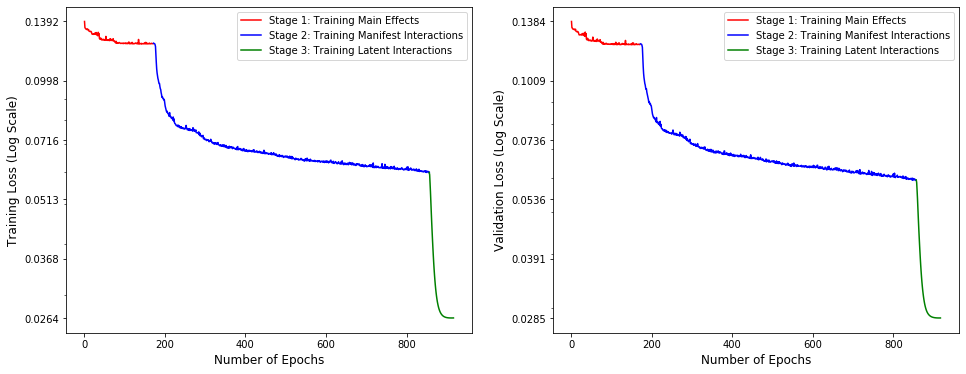

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


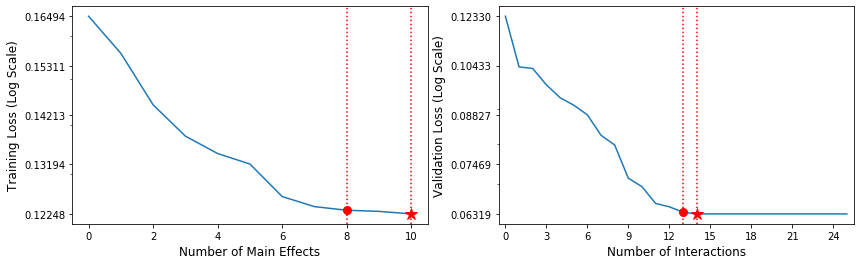

In [3]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False, save_eps=True)
plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False, save_eps=False)

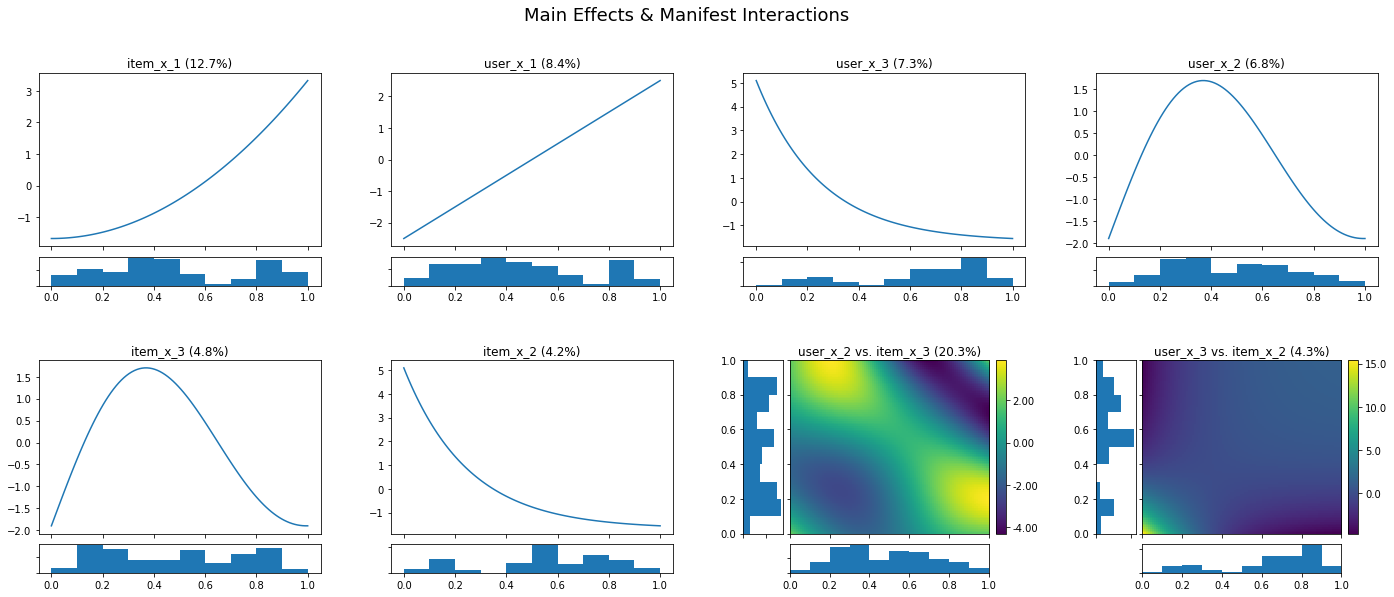

In [24]:
global_visualize_density(data_dict, save_png=True, folder=simu_dir, name='s1_global')